# Aproximação de funções para problemas de classificação.

Neste exemplo, iremos combinar alguns neurônios para obter funções discriminantes com diferentes diferentes formatos.

In [41]:
# Import all necessary libraries and functions.
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

## Definição de funções úteis.

In [42]:
def plotSamples(x1, x2, y, filename=''):
    '''Plot the samples.'''
    idx0 = np.argwhere(y == 0)
    idx1 = np.argwhere(y == 1)

    plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
    plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.legend()
    if(filename != ''): plt.savefig(filename, dpi=600)
    plt.grid()
    plt.show()

def plotDecisionBoundary(clf, x1, x2, filename=''):
    '''Plot the decision boundary.'''

    x_min, x_max = x1.min() - .5, x1.max() + .5
    y_min, y_max = x2.min() - .5, x2.max() + .5
    h = 250
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))

    zz = np.zeros((xx.shape))
    for i in range(0, len(xx)):
        for j in range(0, len(yy)):
            aux = clf.predict_proba(np.c_[xx[i,j], yy[i,j]])
            zz[i,j] = aux[0,1]

    plt.figure(figsize=(12,5))
    ax = plt.subplot(1, 2, 1, projection='3d')
    ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    # Add a color bar which maps values to colors.
    ax.set_xlabel('$x_1$',fontsize=14)
    ax.set_ylabel('$x_2$',fontsize=14)
    ax.set_zlabel('$y$',fontsize=14)

    ax = plt.subplot(1, 2, 2)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    # O meshgrid cria uma combinação de pontos (valores) entre os intervalos definidos para plotar as regiões de decisão.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # This attribute matrix must also have the same shape
    # as the one created for the training.
    attribute_matrix = np.c_[xx.ravel(), yy.ravel()]

    Z = clf.predict(attribute_matrix)

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

    # Plot also the training points.
    idx0 = np.argwhere(y == 0)
    idx1 = np.argwhere(y == 1)
    ax.plot(X[idx0, 0], X[idx0, 1], '.', markersize=10, label='Class 0')
    ax.plot(X[idx1, 0], X[idx1, 1], 'r^', markersize=10, label='Class 1')
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    ax.grid()
    if(filename != ''): plt.savefig(filename, dpi=600)
    plt.show()

## Função lógica E (AND) com adição de ruído.

In [43]:
# Number of examples.
N = 10000

# Reset the PN sequence generator.
seed = 4
np.random.seed(seed)

# Attributes.
x1 = np.random.randint(0, 2, N)
x2 = np.random.randint(0, 2, N)

# Noise.
w1 = 0.1*np.random.randn(N,)
w2 = 0.1*np.random.randn(N,)

# AND labels.
y = x1 & x2

# Noisy attributes.
x1 = x1 + w1
x2 = x2 + w2

X = np.c_[x1, x2]

### Plota as classes.

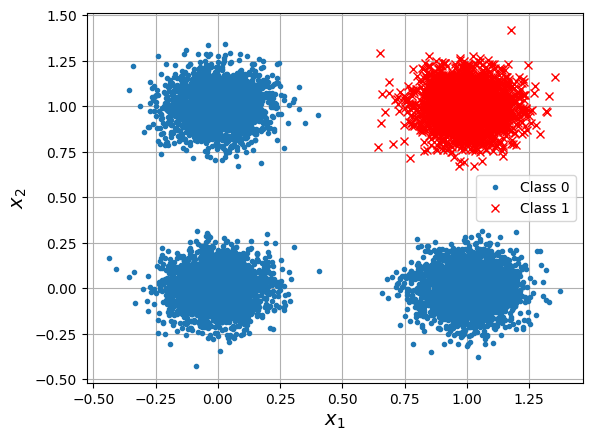

In [44]:
plotSamples(x1, x2, y)

### Treinando a rede neural.

+ Usaremos um objeto da classe `MLPClassifier` da biblioteca scikit-learn para encontrar uma função discriminante que separe estas classes.


+ A classe `MLPClassifier` implementa uma rede neural multi-layer perceptron para tarefas de classificação, ou seja, ela terá um número de neurônios na camada de saída dependendo do número de classes do problema. A função `softmax` é usada como ativação da camada de saída para problemas multiclasses (i.e., $Q>2$) ou a função `logística` para problemas binários (i.e., $Q=2$).


+ A classe `MLPClassifier` possui vários (hiper)parâmetros que podem ser configurados, mas, dentre eles, os que usaremos serão
    + `hidden_layer_sizes`: tupla que define a quantidade de camadas escondidas e nós em cada uma dessas camadas.
    + `activation`: função de ativação de todos os nós das camadas ocultas.
    + `solver`: o otimizador para atualização dos pesos dos nós da rede. Aqui usamos o `lbfgs` que é um algoritmo iterativo similar ao gradiente descendente, mas que além das derivadas de primeira ordem (vetor gradiente), usa informações das derivadas de segunda ordem da função de erro. Ele é indicado para bases de dados pequenas.


+ A documentação da classe pode ser encontrada em:
    + https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


+ Como a função AND é linearmente separável (ver figura acima), para classificar esta função, usaremos uma rede MLP com 0 camadas escondidas e apenas um neurônio na camada de saída.
    + Ou seja, usaremos no total: 1 nó.


+ **OBS**.: Claro que é possível separar as classes com uma rede neural com mais nós e camadas, mas isso aumentaria a complexidade da rede, o que, consequentemente, pode ocasionar sobreajuste.

In [45]:
clf = MLPClassifier(hidden_layer_sizes=(), solver='lbfgs', random_state=seed)

clf.fit(X, y)

y_pred = clf.predict(X)

acc = accuracy_score(y_pred, y)
print('Accuracy: ', acc)

Accuracy:  0.9997


In [46]:
# Acessando os pesos da camada de saída.
print('Output layer vector shape: ', clf.coefs_[0].shape)

# Número de camadas: entrada + saída.
print('n_layers: ', clf.n_layers_)

# Número de iterações até atingir o critério de parada.
print('n_iter: ', clf.n_iter_)

Output layer vector shape:  (2, 1)
n_layers:  2
n_iter:  18


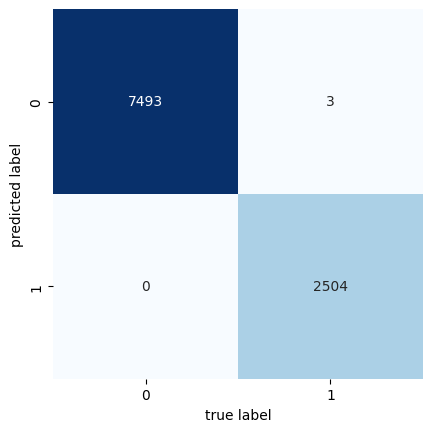

In [47]:
# Plot the confusion matrix.
numberOfClasses = 2
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Plotando as regiões de decisão.

+ A figura da esquerda mostra que um único nó aproxima uma **função de limiar suave**: saída da rede é um valor dentro do intervalo [0, 1].
    + A figura mostra a função de limiar de decisão em 3D.


+ A figura da direita mostra a disposição das amostras das duas classes e a fronteira de decisão (i.e., localização da função discriminante).

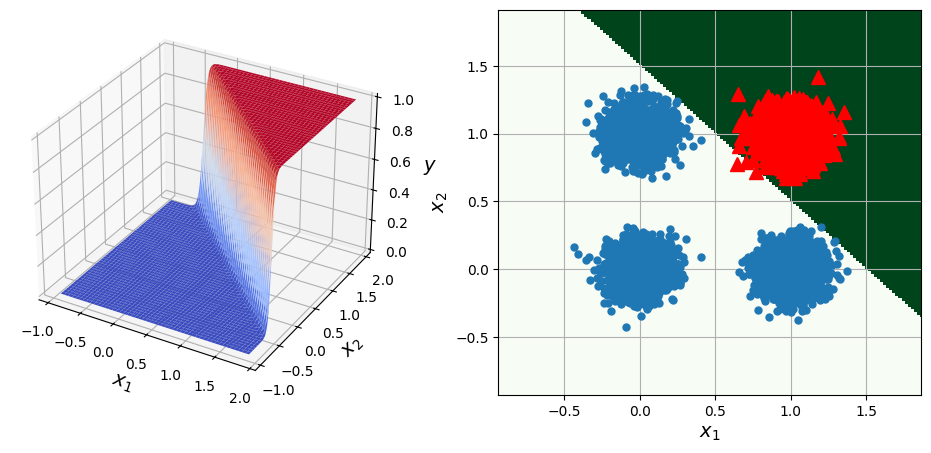

In [48]:
plotDecisionBoundary(clf, x1, x2)

## Função lógica XOR com adição de ruído.

In [49]:
# Number of examples.
N = 10000

# Reset the PN sequence generator.
seed = 4
np.random.seed(seed)

# Attributes.
x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

# Noise.
w1 = 0.1*np.random.randn(N,)
w2 = 0.1*np.random.randn(N,)

# XOR labels.
y = x1 ^ x2

# Noisy attributes.
x1 = x1 + w1
x2 = x2 + w2

X = np.c_[x1,x2]

### Plota as classes.

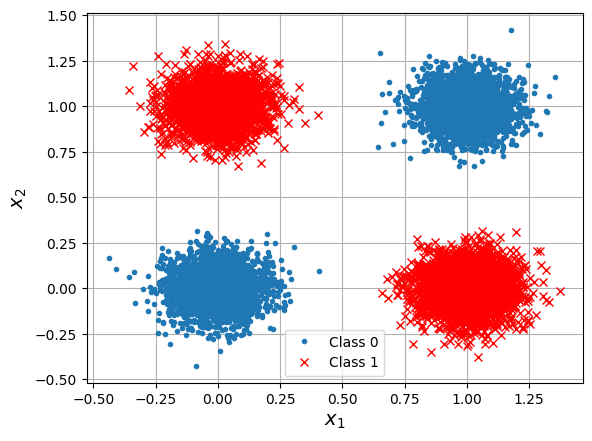

In [50]:
plotSamples(x1, x2, y)

### Treinando a rede neural.

+ Como a função XOR não é linearmente separável, para classificá-la, usaremos uma rede MLP (instância da classe `MLPClassifier`) com 1 camada escondida com 2 nós e um neurônio na camada de saída.


+ A rede MLP terá um total de 3 nós.

In [51]:
clf1 = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', random_state=seed)

clf1.fit(X, y)

y_pred = clf1.predict(X)

acc = accuracy_score(y_pred, y)
print('Accuracy: ', acc)

Accuracy:  0.9993


In [52]:
# Acessando os pesos da camada oculta.
print('Hidden layer matrix shape: ', clf1.coefs_[0].shape)

# Acessando os pesos da camada de saída.
print('Output layer vector shape: ', clf1.coefs_[1].shape)

# Número de camadas: entrada + oculta + saída.
print('n_layers: ', clf1.n_layers_)

# Número de iterações até atingir o critério de parada.
print('n_iter: ', clf1.n_iter_)

Hidden layer matrix shape:  (2, 2)
Output layer vector shape:  (2, 1)
n_layers:  3
n_iter:  27


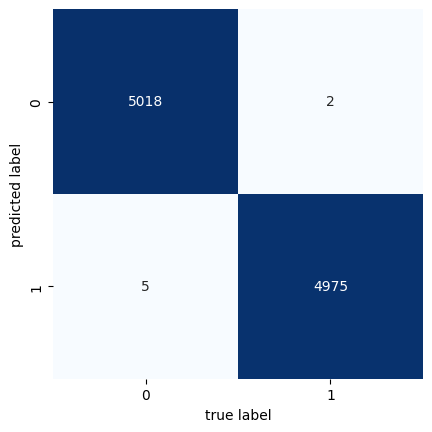

In [53]:
# Plot the confusion matrix.
numberOfClasses = 2
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Plotando as regiões de decisão.


+ Combinando duas funções de limiar de decisão suave com direções opostas, obtemos uma função com formato de onda.


+ A figura da direita mostra a disposição das amostras das duas classes e a fronteira de decisão (i.e., localização da função discriminante).

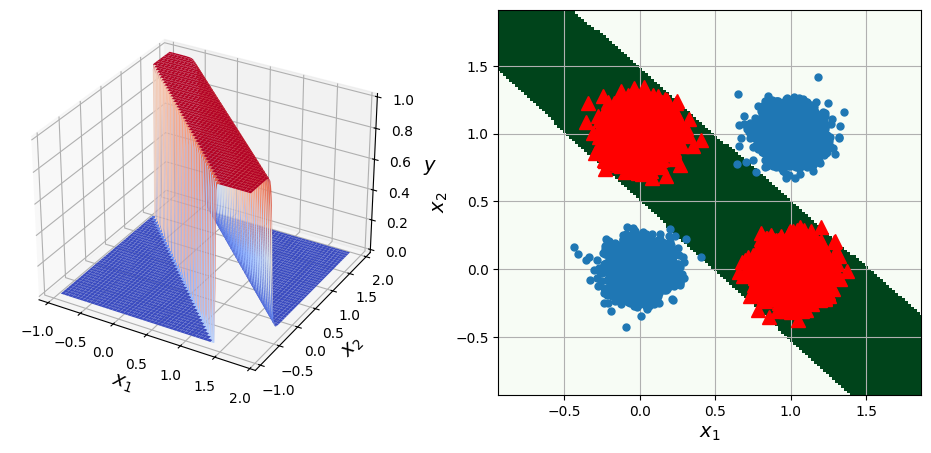

In [54]:
plotDecisionBoundary(clf1, x1, x2)

## Círculos concêntricos com adição de ruído.

In [55]:
# Reset the PN sequence generator.
seed = 0
np.random.seed(seed)

# Create concentric circles with the addition of noise.
    # noise: desvio padrão do ruído Gaussiano adicionado às amostras.
    # factor: fator de escala entre os dois círculos (raio).
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=42)

### Plota as classes.

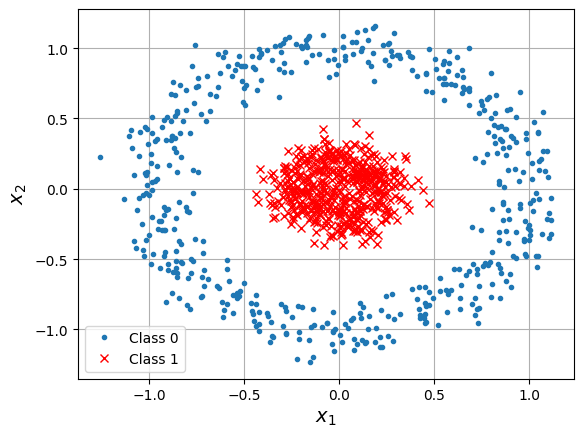

In [56]:
plotSamples(X[:,0], X[:,1], y)

### Treinando a rede neural.

+ Para classificar os círculos concêntricos, usaremos uma rede MLP com 1 camada escondida com 4 nós e apenas um neurônio na camada de saída.


+ A rede MLP terá um total de 5 nós.

In [57]:
clf2 = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', solver='lbfgs', random_state=seed)

clf2.fit(X, y)

y_pred = clf2.predict(X)

acc = accuracy_score(y_pred, y)
print('Accuracy: ', acc)

Accuracy:  0.999


In [58]:
# Acessando os pesos da camada oculta.
print('Hidden layer vector shape: ', clf2.coefs_[0].shape)

# Acessando os pesos da camada de saída.
print('Output layer vector shape: ', clf2.coefs_[1].shape)

# Número de camadas: entrada + oculta + saída.
print('n_layers: ', clf2.n_layers_)

# Número de iterações até atingir o critério de parada.
print('n_iter: ', clf2.n_iter_)

Hidden layer vector shape:  (2, 4)
Output layer vector shape:  (4, 1)
n_layers:  3
n_iter:  44


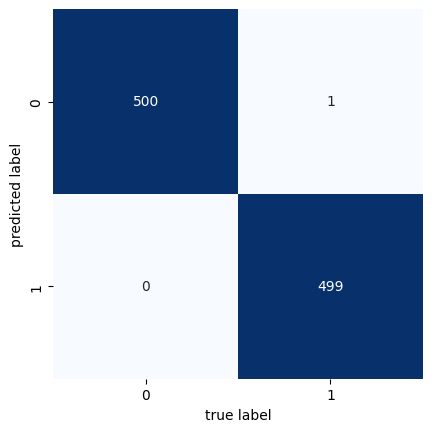

In [59]:
# Plot the confusion matrix.
numberOfClasses = 2
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Plotando as regiões de decisão.

+ Combinando duas ondas perpendiculares, nós obtemos uma função com formato similar a de um triângulo (algumas vezes, dependendo da semente, o formato pode ser o de um quadrado).


+ A figura da direita mostra a disposição das amostras das duas classes e a fronteira de decisão (i.e., localização da função discriminante).

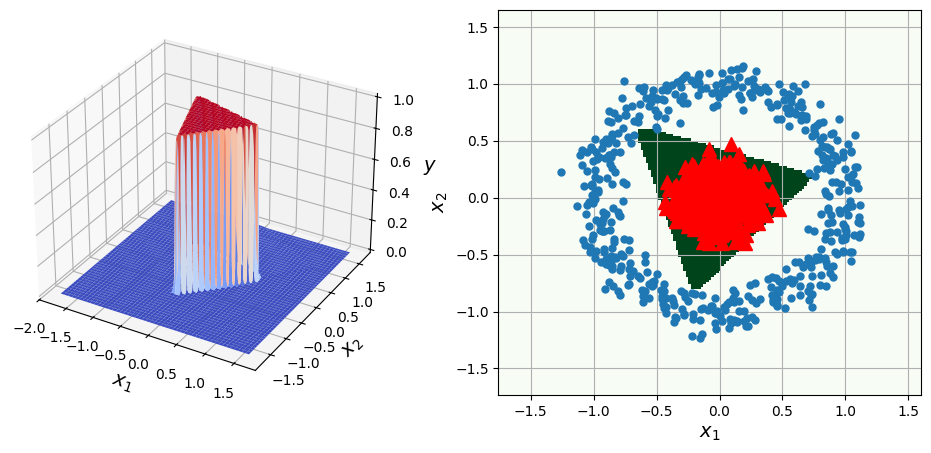

In [60]:
plotDecisionBoundary(clf2, X[:,0], X[:,1])